# Stochastic Model: Results of different #agent values

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
results = pd.read_csv('./agents_results.csv')
results = results.drop_duplicates(subset='damage')
results = results.loc[(results['num_robots'] == 3) & (results['f'] == 2) & (results['sigma'] == 1) & (results['d'] == 10)]
results = results.groupby(['planner', 'num_agents'], as_index=False).mean()
results.head()

,planner,num_agents,num_robots,f,d,sigma,active_time,planner_time,damage,num_disabled
0,StochasticIterativePlanner,50,3.0,2.0,10.0,1.0,192.016642,0.113230,6947.143136,34.030667
1,StochasticIterativePlanner,100,3.0,2.0,10.0,1.0,220.408217,0.434287,15321.293541,57.128333
2,StochasticIterativePlanner,200,3.0,2.0,10.0,1.0,237.108658,1.319218,34527.652512,91.198000
3,StochasticIterativePlanner,300,3.0,2.0,10.0,1.0,246.813653,2.799894,54373.954593,121.281667
4,StochasticStaticLackPlanner,50,3.0,2.0,10.0,1.0,136.918737,107.093800,8690.809642,21.676667


In [7]:
planners_names = ['StochasticAdditive5LackPlanner', 'StochasticIterativePlanner', 'StochasticStaticLackPlanner']

colors = ['tab:red', 'tab:brown', 'tab:blue', 'tab:green', 'navajowhite', 'burlywood', 'tab:orange']

planners_results = [results.loc[results['planner'] == name] for name in planners_names]

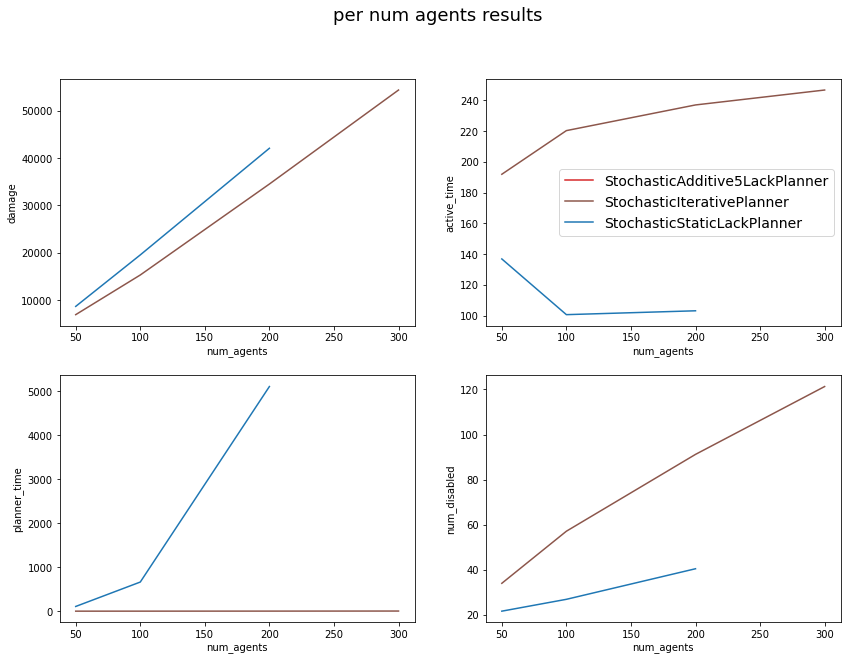

In [8]:
Y = ['damage', 'active_time', 'planner_time', 'num_disabled']
X = ['num_agents' for y in Y]

plt.figure(figsize=(14,10))
plt.suptitle('per num agents results', fontsize=18)

for i in range(len(Y)):
    x = X[i]
    y = Y[i]

    plt.subplot(2, 2, i+1)
    plt.xlabel(x)
    plt.ylabel(y)
    for j in range(len(planners_results)):
        r = planners_results[j]
        plt.plot(list(r[x]), list(r[y]), c=colors[j])

    if i==1:
        plt.legend(planners_names, fontsize='14')

plt.savefig('./plots/stochastic_num_agents.png')
plt.show()